# Algorithmic Trading Strategy (Bollinger Bands)

## Before we start, let's go through the theory behind this strategy.

### The backing of this strategy revolves around the assumption that the prices of non-derivative assets will trade in a normal distribution. This means that when an asset price’s stock moves greater than 2 standard deviations away from its normal range, it can be considered an outlier that must be traded against.

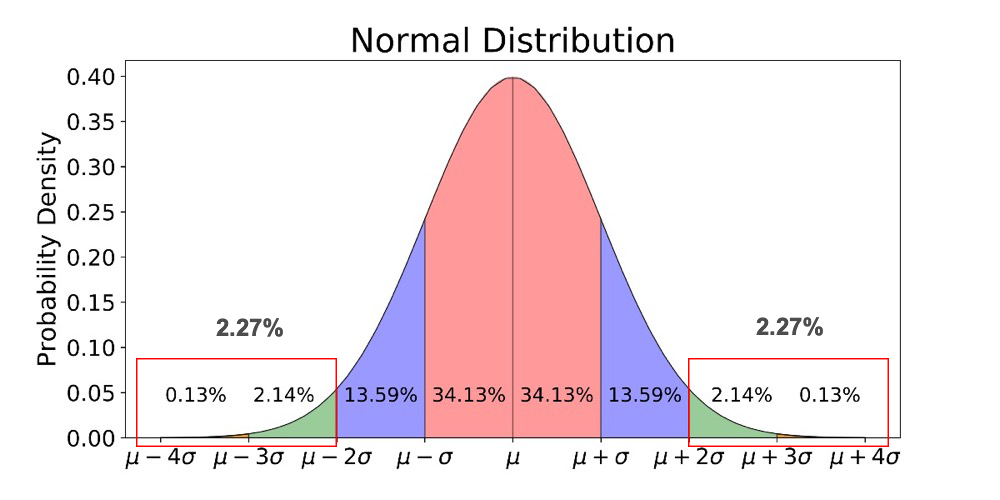

## For Example: If the standard deviation of the close price is larger than +2 , then you should Sell your stock and if the standard deviation of the close price is less than -2 , then you should Buy more.

# 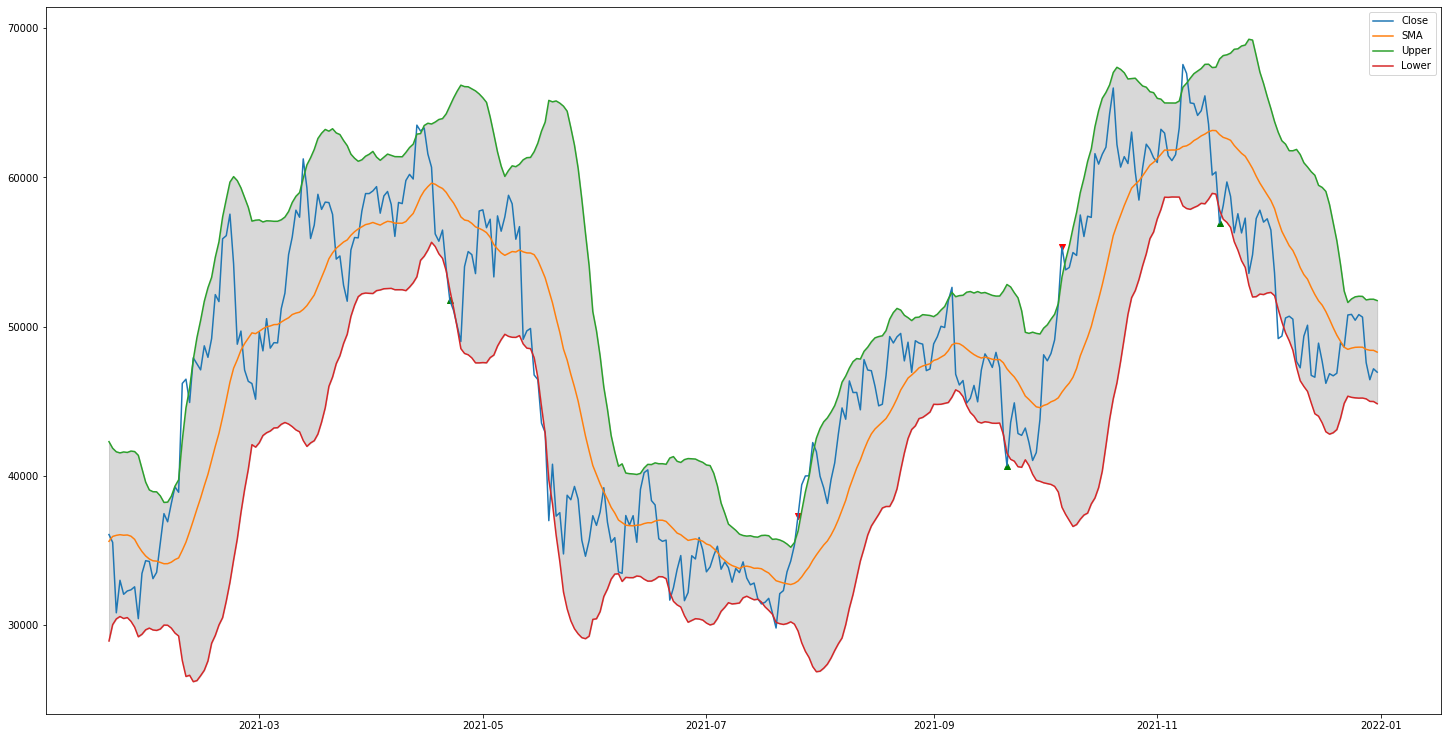

# -------------------------------------------------------------------------

# Bitcoin Price
## Get Bitcoin Data from yfinance (every day for 1 year)

In [73]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

data = yf.download(tickers = ('DEN'), 
                   period = '1y', 
                   interval = '1d',
                   auto_adjust = True)
df = pd.DataFrame(data)
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2022-01-13,77.900002,79.150002,76.199997,76.599998,312300
2022-01-14,76.080002,78.389999,74.714996,76.930000,405200
2022-01-18,77.610001,78.599998,73.150002,73.309998,593700
2022-01-19,74.220001,75.839996,72.269997,74.980003,599600
2022-01-20,74.739998,76.750000,72.010002,72.370003,377900
...,...,...,...,...,...
2023-01-06,82.059998,85.129997,81.120003,83.419998,350000
2023-01-09,84.220001,85.989998,82.900002,82.930000,538200
2023-01-10,83.080002,84.260002,80.620003,83.919998,332900


In [74]:
## Simple Moving Average (SMA) for 30 days
df['SMA'] = df.Close.rolling(window=30).mean()

## standard deviations for 30 days
df['stddev'] = df.Close.rolling(window=30).std()

## Upper is 2 standard deviations above SMA and Lower is 2 standard deviations below SMA
df['Upper'] = df.SMA + 2.1 * df.stddev
df['Lower'] = df.SMA - 2.1 * df.stddev

## Generate the Buy_signal and Sell_signal based on the strategy
df['Buy_signal'] = np.where(df.Close < df.Lower, True, False)
df['Sell_signal'] = np.where(df.Close > df.Upper, True, False)

## Remove nan value
df = df.dropna()
df

,Open,High,Low,Close,Volume,SMA,stddev,Upper,Lower,Buy_signal,Sell_signal
Date,,,,,,,,,,,
2022-02-25,69.440002,71.190002,67.660004,70.769997,486700,70.956000,3.495353,78.296240,63.615759,False,False
2022-02-28,70.199997,72.860001,70.040001,72.660004,690000,70.824667,3.346839,77.853029,63.796304,False,False
2022-03-01,73.349998,75.244003,71.769997,73.510002,912700,70.710667,3.186094,77.401465,64.019869,False,False
2022-03-02,75.489998,76.510002,74.019997,75.690002,879900,70.790000,3.281259,77.680644,63.899356,False,False
2022-03-03,74.970001,76.264999,73.809998,74.900002,533500,70.787333,3.277767,77.670644,63.904023,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-06,82.059998,85.129997,81.120003,83.419998,350000,86.043333,2.729850,91.776018,80.310647,False,False
2023-01-09,84.220001,85.989998,82.900002,82.930000,538200,85.846333,2.734313,91.588391,80.104275,False,False
2023-01-10,83.080002,84.260002,80.620003,83.919998,332900,85.644666,2.641210,91.191207,80.098126,False,False


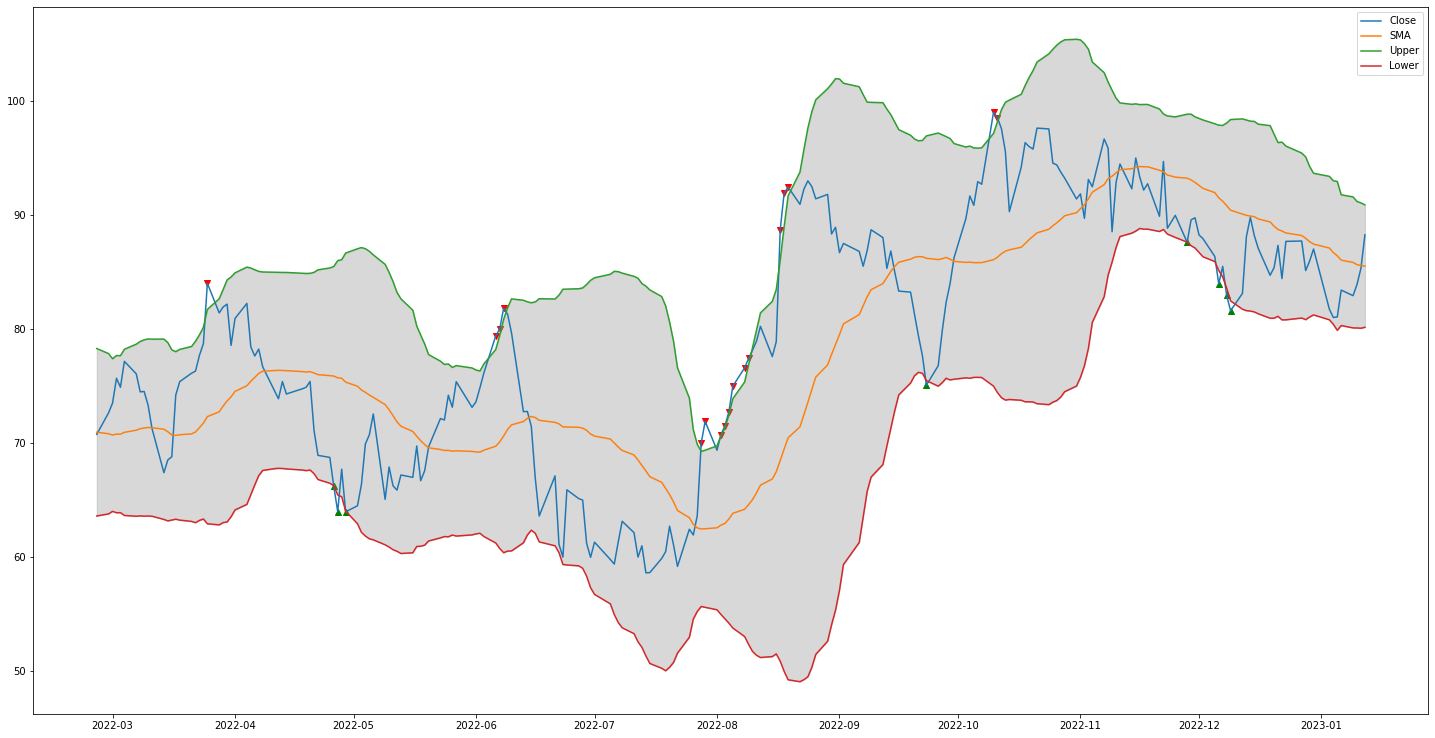

In [75]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.index[df.Buy_signal], df[df.Buy_signal].Close, marker='^', color = 'g')
plt.scatter(df.index[df.Sell_signal], df[df.Sell_signal].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Improve our buy and sell signal (Buy 1 Sell 1)

In [76]:
## Define new lists and stock_on_hand

buy = []
sell = []
stock_on_hand = False

## change multiple buy and sell to only 1 buy and 1 sell

for i in range(len(df)):
    if df.Close[i] < df.Lower[i]:
        if stock_on_hand == False:
            buy.append(i)
            stock_on_hand = True
    elif df.Close[i] > df.Upper[i]:
        if stock_on_hand == True:
            sell.append(i)
            stock_on_hand = False

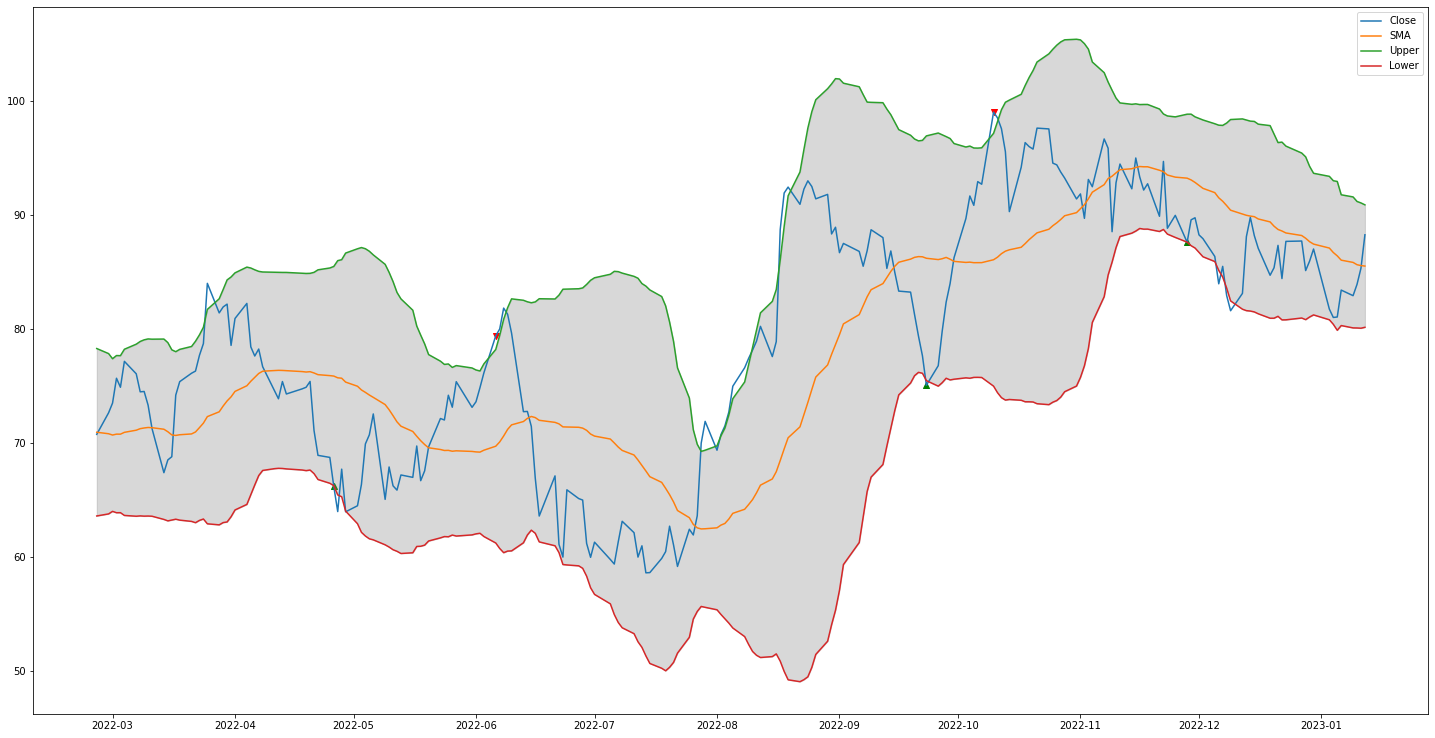

In [77]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.iloc[buy].index, df.iloc[buy].Close, marker='^', color = 'g')
plt.scatter(df.iloc[sell].index, df.iloc[sell].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Check if you can make profit based on this strategy

In [78]:
share = 1000
profit = 0

for i in range(len(sell)):
    
    profit = profit - (df.iloc[buy[i]].Close * share)
    profit = profit + (df.iloc[sell[i]].Close * share)
    
profit

37139.99938964844